In [ ]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler

import umap

/Users/jac340/envs/general/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
# define compounds in scope as a dictionary

scope_compounds_dict = {
    "8a": "EN300-20027",
    "8b": "EN300-18989",
    "8c": "AJC001",
    "8d": "EN300-13206",
    "8e": "EN300-16958",
    "8f": "EN300-20348",
    "8g": "EN300-62688",
    "8h": "AJC002",
    "8i": "EN300-43319",
    "8j": "EN300-61954",
    "8k": "EN300-39266",
    "8l": "AJC003",
    "8m": "EN300-49064",
    "8n": "EN300-18739",
    "8o": "EN300-77249",
    "8p": "EN300-12163",
    "8q": "EN300-19571",
    "8r": "EN300-20439",
    "8s": "EN300-75686",
    "8t": "AJC004",
    "8u": "EN300-41781",
    "8v": "EN300-21136",
    "8w": "EN300-7578636",
    "8x": "EN300-19392",
    "8y": "EN300-20438",
    "12": "AJC005"
}

In [4]:
df = pd.read_csv('enamine_primary_amines_with_descriptors.csv', index_col=0).dropna()

In [5]:
features_df = df.drop(columns=['SMILES'])

In [6]:
# remove features where there is no variance
print(f"Original number of features: {features_df.shape[1]}")
selector = VarianceThreshold(threshold=0.01)
selector.fit(features_df)
features_df = features_df.loc[:, selector.get_support()]
print(f"Reduced number of features: {features_df.shape[1]}")

Original number of features: 107
Reduced number of features: 101


In [7]:
# remove features which are highly correlated

cutoff = 0.9

print(f"Original number of features: {features_df.shape[1]}")
df_corr = features_df.corr()
df_not_correlated = ~(df_corr.mask(np.tril(np.ones([len(df_corr)]*2, dtype=bool))).abs() > cutoff).any()
un_corr_index = df_not_correlated.loc[df_not_correlated[df_not_correlated.index] == True].index
sel_features_df = features_df[un_corr_index]
print(f"Reduced number of features: {sel_features_df.shape[1]}")

Original number of features: 101
Reduced number of features: 80


In [8]:
# scale the remaining features
scaler = StandardScaler()
scaler.fit(sel_features_df)

scaled_features = scaler.transform(sel_features_df)

In [9]:
# run the UMAP on the scaled features

umap_reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors=30, min_dist=0.1)
umap_reduced_features = umap_reducer.fit_transform(scaled_features)

/Users/jac340/envs/general/lib/python3.13/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [10]:
# add the UMAP results back to the original dataframe
df['UMAP1'] = umap_reduced_features[:, 0]
df['UMAP2'] = umap_reduced_features[:, 1]

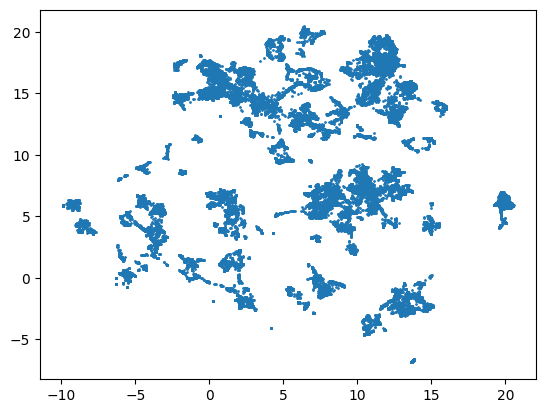

In [11]:
plt.scatter(df['UMAP1'], df['UMAP2'], s=1)

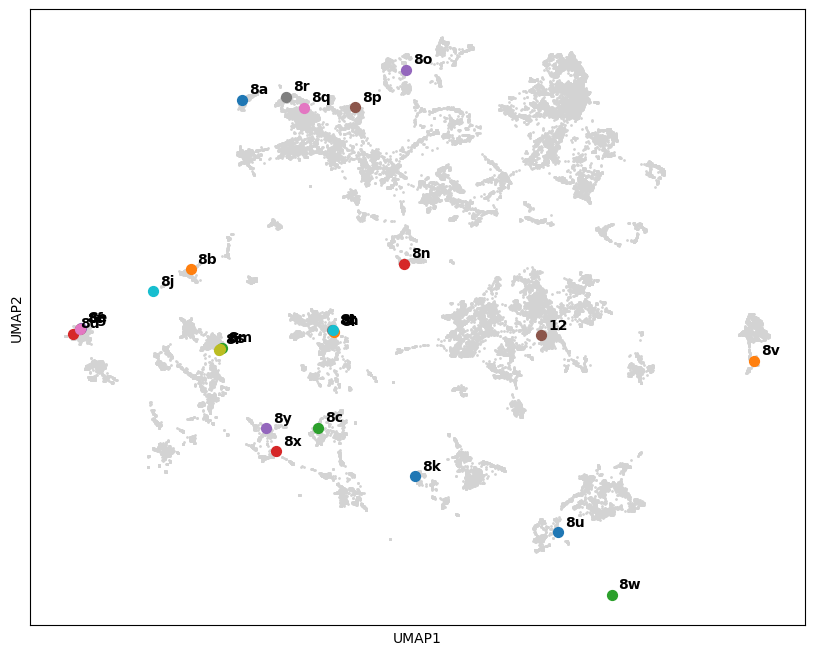

In [13]:
# show the space with the scope compounds highlighted

plt.figure(figsize=(10, 8))
plt.scatter(df['UMAP1'], df['UMAP2'], s=1, color='lightgrey')   
for label, enamine_id in scope_compounds_dict.items():
    if enamine_id in df.index:
        plt.scatter(df.loc[enamine_id, 'UMAP1'], df.loc[enamine_id, 'UMAP2'], s=50, label=label)
        plt.text(
            df.loc[enamine_id, 'UMAP1']+0.3,
            df.loc[enamine_id, 'UMAP2']+0.3,
            label,
            fontweight='bold'
        )
# plt.legend()
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')

plt.xticks([])
plt.yticks([])

# plt.title('Chemical Space of Enamine Primary Amines with Scope Compounds Highlighted')
plt.show()

In [14]:
sel_features_df

,MaxAbsEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,MaxPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,...,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState7,VSA_EState8,VSA_EState9,FractionCSP3,MolLogP
Catalog_ID,,,,,,,,,,,,,,,,,,,,,
EN300-16708,10.238704,0.071111,-0.576296,0.568881,9.545455,218.010,0.311774,1.727273,2.363636,2.818182,...,3.042083,13.251551,10.238704,5.035625,-0.071111,1.405093,0.000000,0.000000,0.000000,1.33450
EN300-02528,5.767028,0.774774,0.774774,0.644400,10.750000,226.304,0.124180,1.000000,1.875000,2.687500,...,1.692407,4.587037,1.021759,8.672473,0.000000,0.000000,0.000000,0.000000,0.000000,3.54550
EN300-06825,8.318512,0.490972,0.490972,0.414590,9.090909,184.651,0.138080,1.545455,2.272727,2.818182,...,6.765525,0.811759,10.757360,5.996822,0.000000,0.000000,0.000000,0.000000,0.000000,2.49538
EN300-07837,12.732753,0.245470,-3.511001,0.696650,15.034483,418.563,0.242625,0.965517,1.551724,2.103448,...,0.000000,4.745256,0.000000,8.719234,0.867061,0.000000,7.795811,-1.826876,0.428571,2.63450
EN300-07654,5.038333,0.122685,0.122685,0.495264,9.285714,99.093,0.312252,1.571429,2.285714,2.428571,...,0.000000,0.000000,6.851852,5.038333,0.497685,0.000000,1.683889,0.000000,0.333333,-0.03978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AJC001,10.551250,0.093472,-0.215278,0.559819,12.777778,131.175,0.306834,1.777778,2.333333,2.666667,...,0.000000,10.551250,0.000000,5.322761,-0.215278,0.313333,3.987656,0.000000,0.833333,0.28680
AJC002,11.583285,0.218148,-0.406105,0.641762,19.571429,200.282,0.409780,1.357143,1.857143,2.285714,...,0.000000,13.314049,0.000000,5.339455,0.000000,1.530350,7.063400,0.000000,0.900000,1.34460
AJC003,11.234653,0.136591,-0.405984,0.580687,18.833333,172.228,0.409891,1.500000,2.000000,2.333333,...,0.000000,12.841713,0.000000,5.115000,0.000000,-0.260000,6.795307,0.000000,0.875000,0.56440


In [15]:
sel_features_df.to_csv('enamine_primary_amines_space_descriptors.csv')

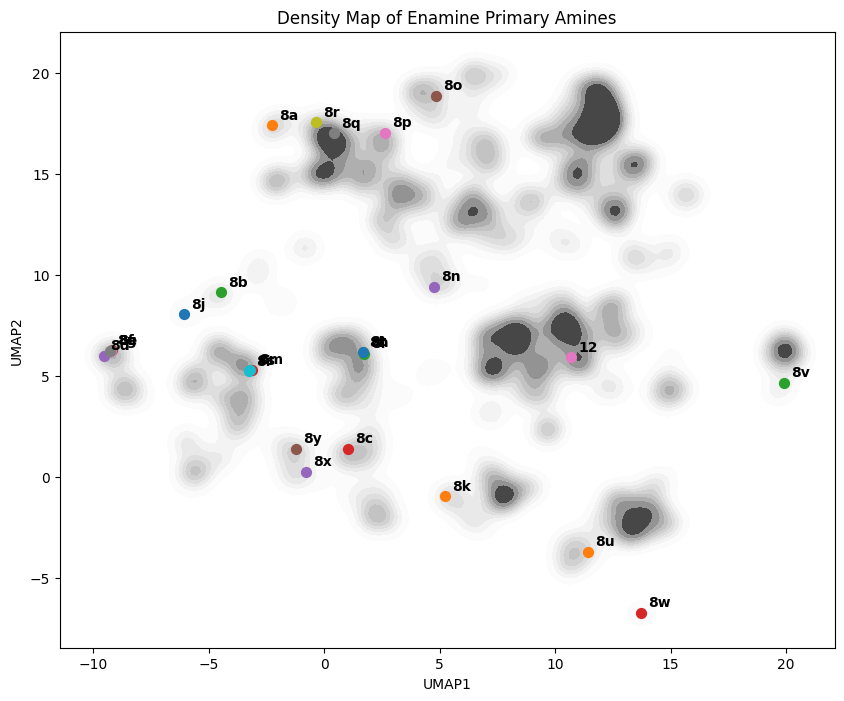

In [16]:
# view the umap as a kde density map
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.kdeplot(x=df['UMAP1'], y=df['UMAP2'], fill=True, cmap='Grays', bw_adjust=0.5)
plt.title('Density Map of Enamine Primary Amines')
plt.xlabel('UMAP1')
plt.ylabel('UMAP2')

for label, enamine_id in scope_compounds_dict.items():
    if enamine_id in df.index:
        plt.scatter(df.loc[enamine_id, 'UMAP1'], df.loc[enamine_id, 'UMAP2'], s=50, label=label)
        plt.text(
            df.loc[enamine_id, 'UMAP1']+0.3,
            df.loc[enamine_id, 'UMAP2']+0.3,
            label,
            fontweight='bold'
        )

plt.show()